In [2]:
import faiss
import numpy as np

from datasets import load_dataset

from tqdm import tqdm

from pprint import pprint

import matplotlib.pyplot as plt

c:\Users\faree\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
bert_index = faiss.read_index("../GeneratingEmbeddings/Indexes/bert_mini_embeddings.index") # 256
bert_mini_index = faiss.read_index("../GeneratingEmbeddings/Indexes/fasttext_embeddings.index") # 128

In [5]:
def load_base_embeddings():
    e_list = []
    for i in range(1, 19):
        embeddings = np.load(f'../GeneratingEmbeddings/bert_mini_embeddings/embeddings_{i}000.npz')['arr_0'].reshape(-1, 256)
        e_list.append(embeddings)
    
    e = np.concatenate(e_list, axis=0)
    return e

def load_tiny_embeddings():
    e_list = []
    for i in range(1, 19):
        embeddings = np.load(f'../GeneratingEmbeddings/fasttext_embeddings/embeddings_{i}000.npz')['arr_0'].reshape(-1, 300)
        e_list.append(embeddings)
    
    e = np.concatenate(e_list, axis=0)
    return e


base_embeddings = load_base_embeddings()
tiny_embeddings = load_tiny_embeddings()

In [6]:
def intersection(a, b):
    a = a[0]
    b = b[0]
    return np.intersect1d(a, b)

def union(a, b):
    a = a[0]
    b = b[0]
    return np.union1d(a, b)


In [7]:
D_Base, I_Base = bert_index.search(base_embeddings[0:1], 1000)
D_Tiny, I_Tiny = bert_mini_index.search(tiny_embeddings[0:1], 1000)

In [8]:
len(I_Base[0])

1000

In [9]:
len(I_Tiny[0])

1000

In [10]:
intersection(I_Base, I_Tiny)

array([     0, 361367], dtype=int64)

In [11]:
union(I_Base, I_Tiny)

array([      0,     122,    1419, ..., 2289695, 2291293, 2293419],
      dtype=int64)

In [12]:
def jacard_similarity(a, b):
    return len(intersection(a, b)) / len(union(a, b))

In [13]:
jacard_similarity(I_Base, I_Tiny)

0.001001001001001001

In [15]:
jacc = []
for i in tqdm(range(1000)):
    _, I_Base = bert_index.search(base_embeddings[i:i+1], 1000)
    _, I_Tiny = bert_mini_index.search(tiny_embeddings[i:i+1], 1000)
    jacc.append(jacard_similarity(I_Base, I_Tiny))

100%|██████████| 1000/1000 [03:53<00:00,  4.29it/s]


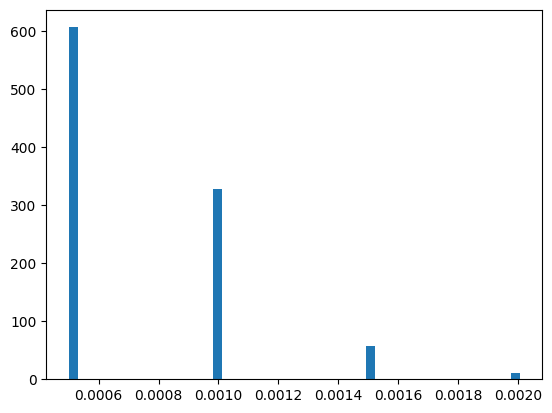

In [19]:
plt.hist(jacc, bins=50)
plt.show()